In [1]:
import sympy as sym

import numpy as np

import repeated_play

In [2]:
import itertools 

In [3]:
from tqdm.notebook import tqdm

In [4]:
sym.init_printing(True)

In [36]:
b, c, eps = sym.symbols("b, c, \epsilon")

### Memory-1

In [39]:
pc, pd = sym.symbols("pc, pd")

qc, qd = sym.symbols("qc, qd")

In [46]:
row_one = [(pc * (1 - eps) + (1 - pc) * eps) + (qc * (1 - eps) + (1 - qc) * eps),
           (pc * (1 - eps) + (1 - pc) * eps)  * (1 - qc),
           (1 - pc) * (qc * (1 - eps) + (1 - qc) * eps),
           (1 - pc) * (1 - qc)]

In [47]:
row_two = [(pc * (1 - eps) + (1 - pc) * eps) + (qd * (1 - eps) + (1 - qd) * eps),
           (pc * (1 - eps) + (1 - pc) * eps)  * (1 - qd),
           (1 - pc) * (qd * (1 - eps) + (1 - qd) * eps),
           (1 - pc) * (1 - qd)]

In [48]:
row_three = [(pd * (1 - eps) + (1 - pd) * eps) + (qc * (1 - eps) + (1 - qc) * eps),
             (pd * (1 - eps) + (1 - pd) * eps)  * (1 - qc),
             (1 - pd) * (qc * (1 - eps) + (1 - qc) * eps),
             (1 - pd) * (1 - qc)]

In [49]:
row_four = [(pd * (1 - eps) + (1 - pd) * eps) + (qd * (1 - eps) + (1 - qd) * eps),
            (pd * (1 - eps) + (1 - pd) * eps)  * (1 - qd),
            (1 - pd) * (qd * (1 - eps) + (1 - qd) * eps),
            (1 - pd) * (1 - qd)]

In [70]:
M = sym.Matrix([row_one, row_two, row_three, row_four])

In [77]:
sum(M[0, :].subs({pc:1, qc:1}))

In [72]:
sum(row_one.subs({pc:1})).factor()

AttributeError: 'list' object has no attribute 'subs'

In [211]:
strategy = [1 * (1 - epsilon), pd * (1 - epsilon)]

In [235]:
M = repeated_play.transition_matrix_repeated_game(strategy * 2, strategy * 2, memory='one', analytical=True)

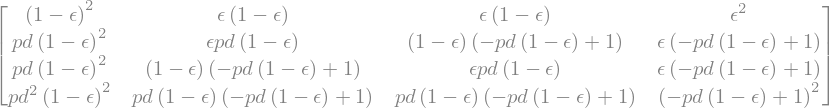

In [236]:
M

In [237]:
ss = repeated_play.stationary_distribution(M, analytical=True)

In [238]:
self_payoff = sum(ss @ np.array([b - c, -c, b, 0]))

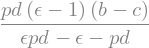

In [239]:
self_payoff.factor()

In [240]:
sym.limit(self_payoff, eps, 0)

In [241]:
M = M - sym.eye(4, 4)

In [242]:
M[:, -1] = [b - c, -c, b, 0]

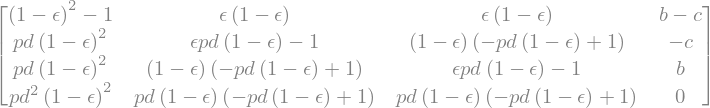

In [243]:
M

In [244]:
num = M.det()

In [245]:
M[:, -1] = [1, 1, 1, 1]

In [246]:
den = M.det()

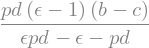

In [247]:
(num / den).factor()

In [205]:
self_payoff = self_payoff.factor()

In [206]:
pure_strategies = list(itertools.product([0, 1], repeat=2))

In [207]:
M1 = repeated_play.transition_matrix_repeated_game(list(pure_strategies[0]) * 2,
                                                   strategy * 2, memory='one', analytical=True)

In [208]:
ss1 = repeated_play.stationary_distribution(M1, analytical=True)

In [105]:
alld_payoff = sum(ss1 @ np.array([b - c, -c, b, 0]))

In [106]:
alld_payoff

### $n=3$

In [248]:
pcc, pcd, pdc, pdd = sym.symbols("p_{CC}, p_{CD}, p_{DC}, p_{DD}")

In [249]:
pure_strategies = list(itertools.product([0, 1], repeat=4))

In [250]:
strategy = [1 * (1 - epsilon),
            pcd * (1 - epsilon),
            1 * (1 - epsilon),
            pcd * (1 - epsilon),
            pdc * (1 - epsilon),
            pdd * (1 - epsilon),
            pdc * (1 - epsilon),
            pdd * (1 - epsilon)]

In [251]:
strategy = strategy * 2

In [252]:
strategy

In [253]:
M = repeated_play.transition_matrix_repeated_game(strategy,
                                                  strategy,
                                                  memory='two',
                                                  analytical=True)

In [254]:
M = M - sym.eye(16, 16)

In [257]:
M[:, -1] = [a, b, c, d, e, f, g, h, j, k, l, m, n, o, p, q]

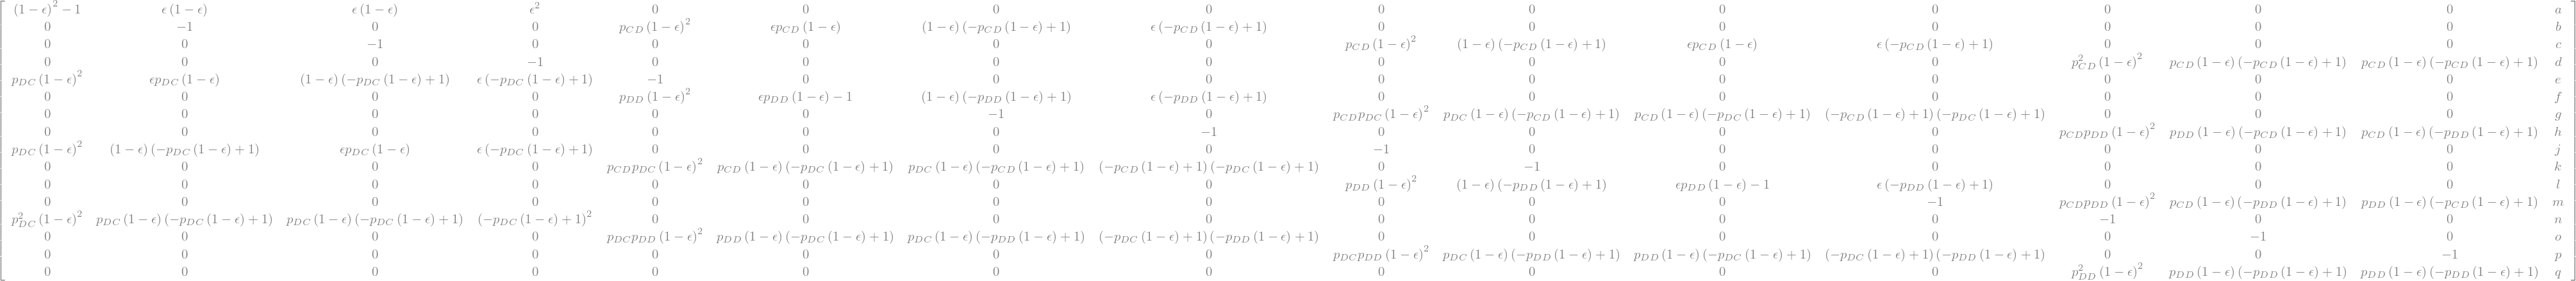

In [262]:
M

In [156]:
# ss = repeated_play.stationary_distribution(M, analytical=True)

In [261]:
sym.init_printing(True)

In [256]:
a, b, c, d, e, f, g, h, j, k, l, m, n, o, p, q = sym.symbols("a, b, c, d, e, f, g, h, j, k, l, m, n, o, p, q")

In [137]:
M[:, -1] = [1] + [0 for _ in range(15)]

In [147]:
ss = repeated_play.stationary_distribution(M.subs({pcd:1/2, pdc:1/2, pdd:1/2}), analytical=True)

In [151]:
ss = [s.factor() for s in ss]

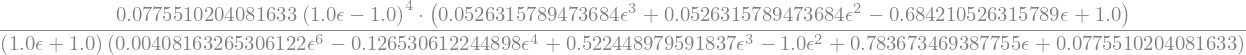

In [153]:
ss[0]

In [114]:
ss = repeated_play.stationary_distribution(M, analytical=True)


KeyboardInterrupt

